# 📦 E-Commerce Shipping Data

*Product Shipment Delivered on Time ?*

## Dataset Overview

This dataset is provided by an *international e-commerce company selling electronic products*, aiming to uncover insights from its customer database.

### Dataset Description

- **Source**: [Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics)
- **Purpose**: To analyze factors affecting timely product delivery and improve service.

### Key Variables

- **ID**: ID Number of Customers.
- **Warehouse Block**: Section of the warehouse (A, B, C, D, E) where the product is stored.
- **Mode of Shipment**: Shipping method (e.g., Ship, Flight, Road).
- **Customer Care Calls**: The number of calls made by customers to inquire about the status of their shipments.
- **Customer Rating**: Rating from 1 (worst) to 5 (best).
- **Cost of the Product**: Price in US dollars.
- **Prior Purchases**: Number of prior purchases by the customer.
- **Product Importance**: Categorized as low, medium, or high.
- **Gender**: Customer's gender (Male/Female).
- **Discount Offered**: Applied discount.
- **Weight in Grams**: Product weight.
- **Reached on Time**: Target variable; 1 = not on time, 0 = on time.

### Project Goals

In this notebook, I will first focus on **exploratory data analysis (EDA)** to gain a comprehensive understanding of the dataset and the relationships between different variables. This step is crucial for preparing the dataset for the second part, which will be dedicated to the **development of machine learning models**.

The aim is to **predict if an item will arrive on time** based on the outlined characteristics. By identifying trends through visualizations and statistical analysis, we can help the company enhance operations and serve customers better.

## Data Wrangling

### Getting Started
*Importation of Libraries and Data Loading*

In [1]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('/Users/arnaudrivat/Documents/Porfolio Arnaud Rivat/Projet n°1/Train.csv')
print("The first 5 rows of the dataframe") 
data.head()

The first 5 rows of the dataframe


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Cleaning and Transformation
*In this section, we clean and transform the dataset by removing irrelevant columns, renaming variables for clarity, and verifying the presence of missing values or duplicate entries to ensure data quality.*


In [3]:
# Dropping the 'ID' column as it is not relevant for the analysis or modeling
data.drop('ID', axis=1, inplace=True)

# Rename the column 'Reached.on.Time_Y.N' to 'Reached_on_Time'
data.rename(columns={'Reached.on.Time_Y.N' : 'Reached_on_Time'} , inplace= True)
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


- The dataset we are working on contains 10,999 observations and 11 variables.

In [4]:
# Data type of each column and Missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached_on_Time      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


- All columns contain 10999 non-null values, which means **there are no missing data entries**.

- **All columns have appropriate data types** for further exploratory data analysis.

In [5]:
# Count the number of numerical and categorical variables
num = data.select_dtypes(include='number').shape[1] 
cat = data.select_dtypes(include='object').shape[1]  

print(f'Number of categorical variables: {cat}')
print(f'Number of numerical variables: {num}')

Number of categorical variables: 4
Number of numerical variables: 7


In [6]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
result = 'Each row is unique ; there are no duplicates' if duplicate_count == 0 else f'Number of duplicates: {duplicate_count}'
print(result)

Each row is unique ; there are no duplicates


**Disclaimer:** The presence of identical rows in the dataset does not necessarily indicate an error or data quality issue. It is possible, though unlikely, that two customers could have placed similar orders: selecting the same product, shipment mode, receiving the same discount, or even giving the same rating. In such cases, while the rows may appear as duplicates, they actually represent distinct customer transactions. Therefore, care must be taken when handling these rows to avoid losing valuable data.

However, in our case, this issue does not arise since all rows in the dataset are unique.


## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [7]:
# Summary of Numerical Variables
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
# Value Counts for Categorical Variables
cat_var = data.select_dtypes(include='object').columns
for cat in cat_var:
    print(f'Value counts for {cat}:\n{data[cat].value_counts()}\n')

Value counts for Warehouse_block:
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Value counts for Mode_of_Shipment:
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Value counts for Product_importance:
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Value counts for Gender:
Gender
F    5545
M    5454
Name: count, dtype: int64



### Data Visualisation

#### Categorical Variables

*Let’s explore the distribution of each modality across the categorical columns.*

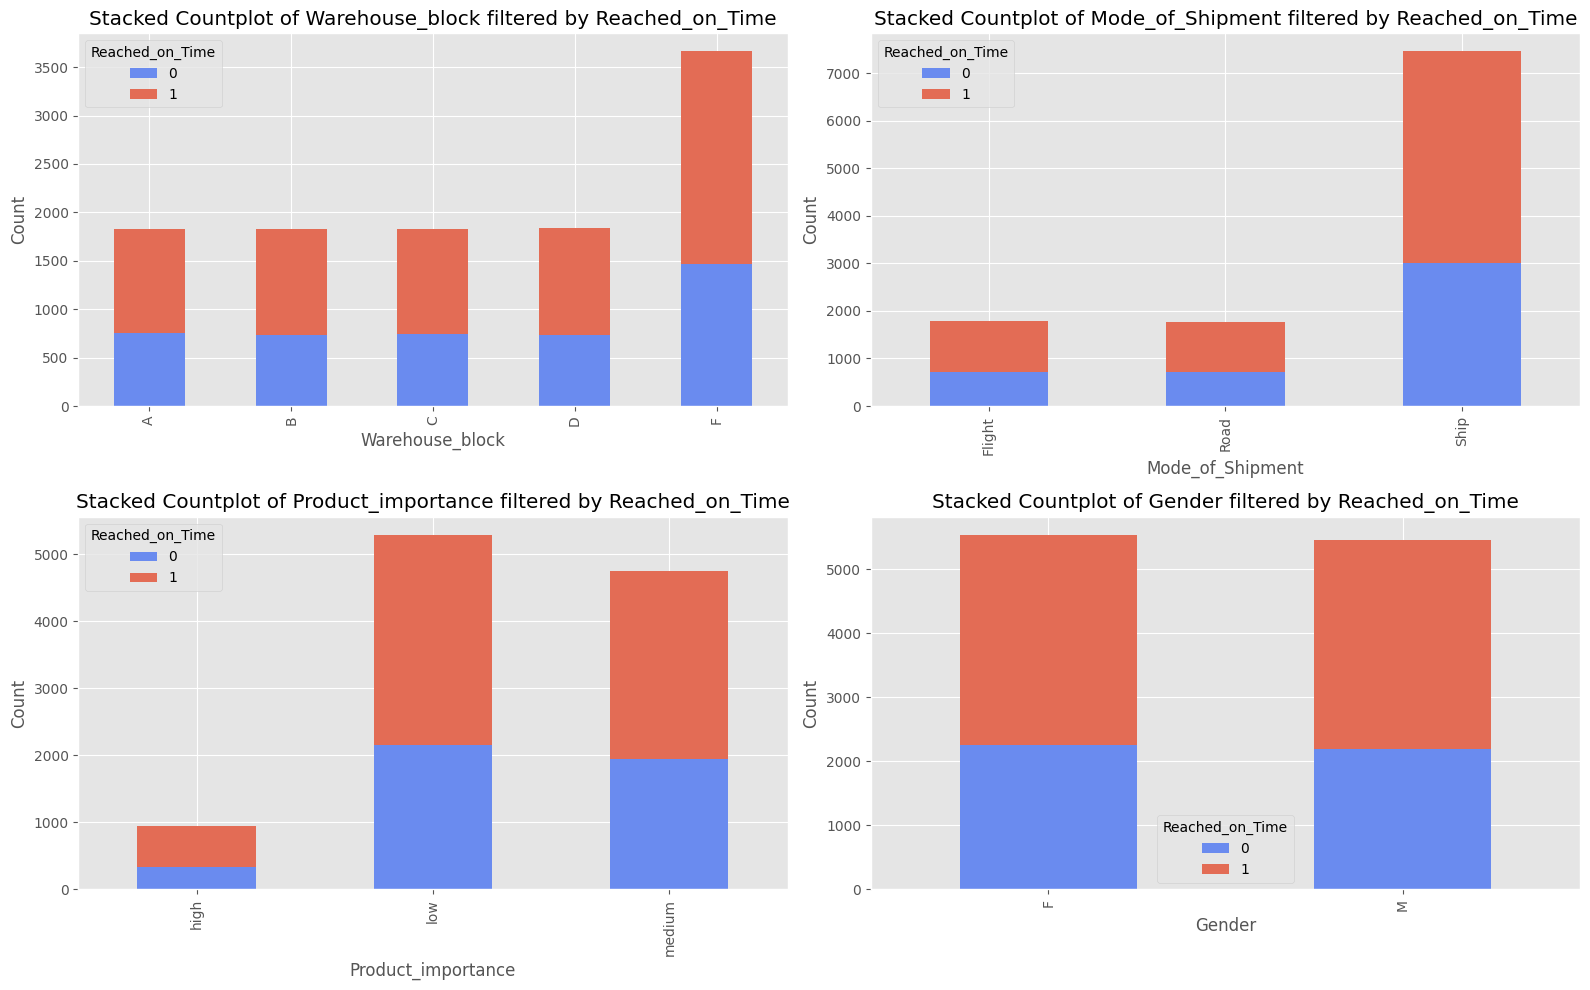

In [9]:
cat_var = data.select_dtypes('object').columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Loop to create a stacked bar plot for each categorical variable
for i, cat in enumerate(cat_var):
    row = i // 2
    col_index = i % 2
    
    # Get the 'coolwarm' colormap
    cmap = plt.get_cmap('coolwarm')
    
    # Calculate counts and reshape the DataFrame for stacking
    count_data = data.groupby([cat, 'Reached_on_Time']).size().unstack(fill_value=0)
    
    # Plot stacked bar plot
    count_data.plot(kind='bar', stacked=True, ax=axes[row, col_index],  color= [cmap(0.15), cmap(0.85)])
    axes[row, col_index].set_title(f"Stacked Countplot of {cat} filtered by Reached_on_Time")
    axes[row, col_index].set_ylabel('Count')
    axes[row, col_index].set_xlabel(cat)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

- Blocks A, B, C, and D are balanced, while block F dominates. The delivery on-time ratio remains consistent across all warehouse blocks.
  
- Shipping is the most used method, accounting for 7,500 orders, while air and road methods represent about 2,000 each. The delivery method doesn't affect the on-time delivery ratio.
  
- Most products have 'low' or 'medium' importance, accounting for almost 10,000 out of 10,999 orders. Product importance does not impact delivery time.
  
- The gender distribution is balanced, with no observed impact on the on-time delivery ratio.

Across different categorical variables such as Warehouse Block, Mode of Shipment, Product Importance, and Gender, the ratio of on-time deliveries remains consistent. This suggests that these factors do not significantly influence whether a product is delivered on time, indicating a certain robustness of these variables with respect to delivery performance.

#### Numerical Variables

*Let’s examine the distribution of each value in the discrete numerical variables.*

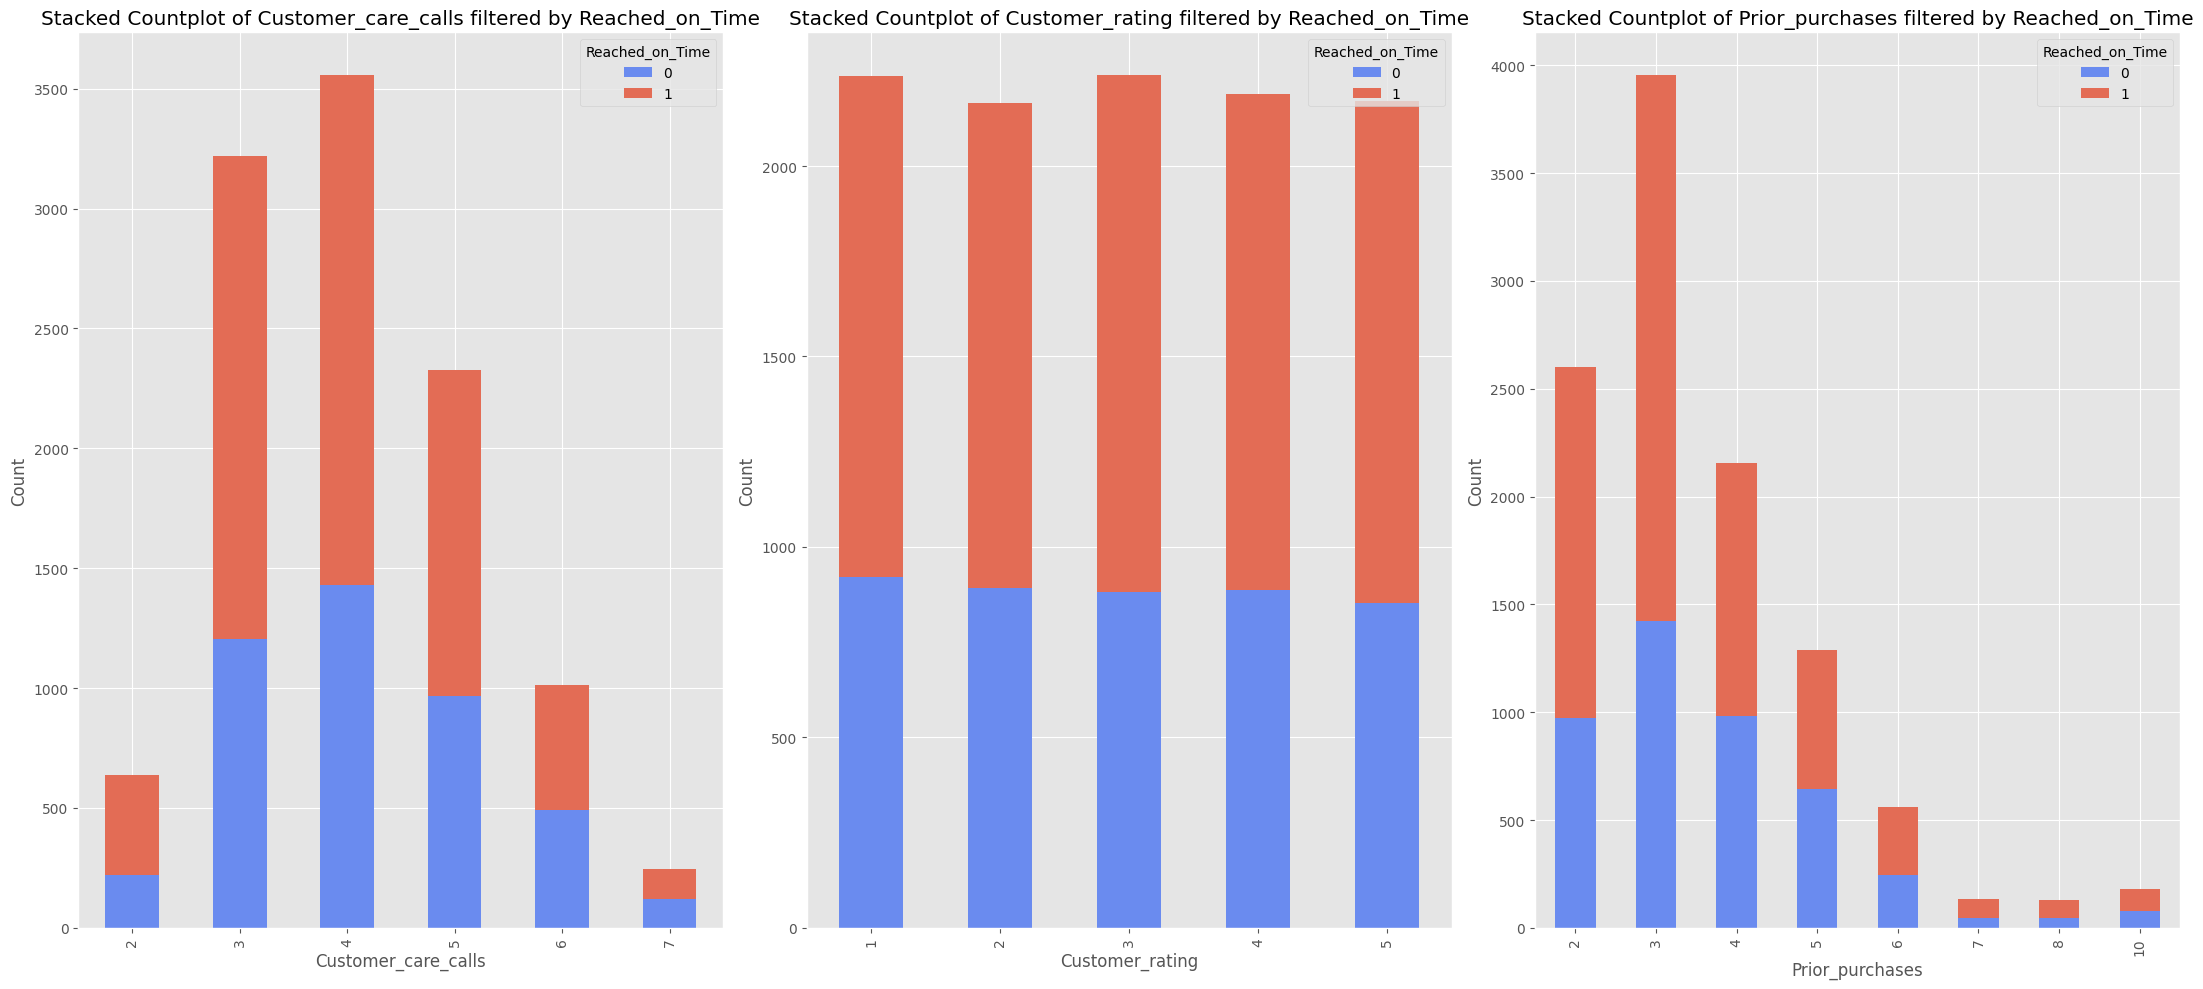

In [10]:
# List of discrete variables to visualize
disc_var = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases'] 
fig, axes = plt.subplots(1, 3, figsize = (22,10))

for i, disc in enumerate(disc_var):
    # Calculate counts and reshape the DataFrame for stacking
    count_data = data.groupby([disc, 'Reached_on_Time']).size().unstack(fill_value=0)
    
    # Get the 'coolwarm' colormap
    cmap = plt.get_cmap('coolwarm')
    
    # Plot stacked bar plot
    count_data.plot(kind='bar', stacked=True, ax=axes[i], color= [cmap(0.15), cmap(0.85)])
    axes[i].set_title(f"Stacked Countplot of {disc} filtered by Reached_on_Time")
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(disc)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

- Customers who made 2 or 3 calls to customer service have a higher proportion of late deliveries, while those who made 6 or 7 calls experience fewer delays. However, these observations remain subtle. The distribution of calls is approximately normal with a slight positive skew, and the mode is at 4.
  
- The evaluation of customers does not appear to have a strong correlation with whether orders arrive on time. The proportions of late and on-time deliveries are similar regardless of the level of customer satisfaction. The distribution is uniform.
  
- The distribution of prior purchases is a positively skewed normal distribution, with a mode of 3. 

*Now that we have visualized the discrete numerical variables, let's shift our focus to the continuous variables and analyze their distributions using histograms.*

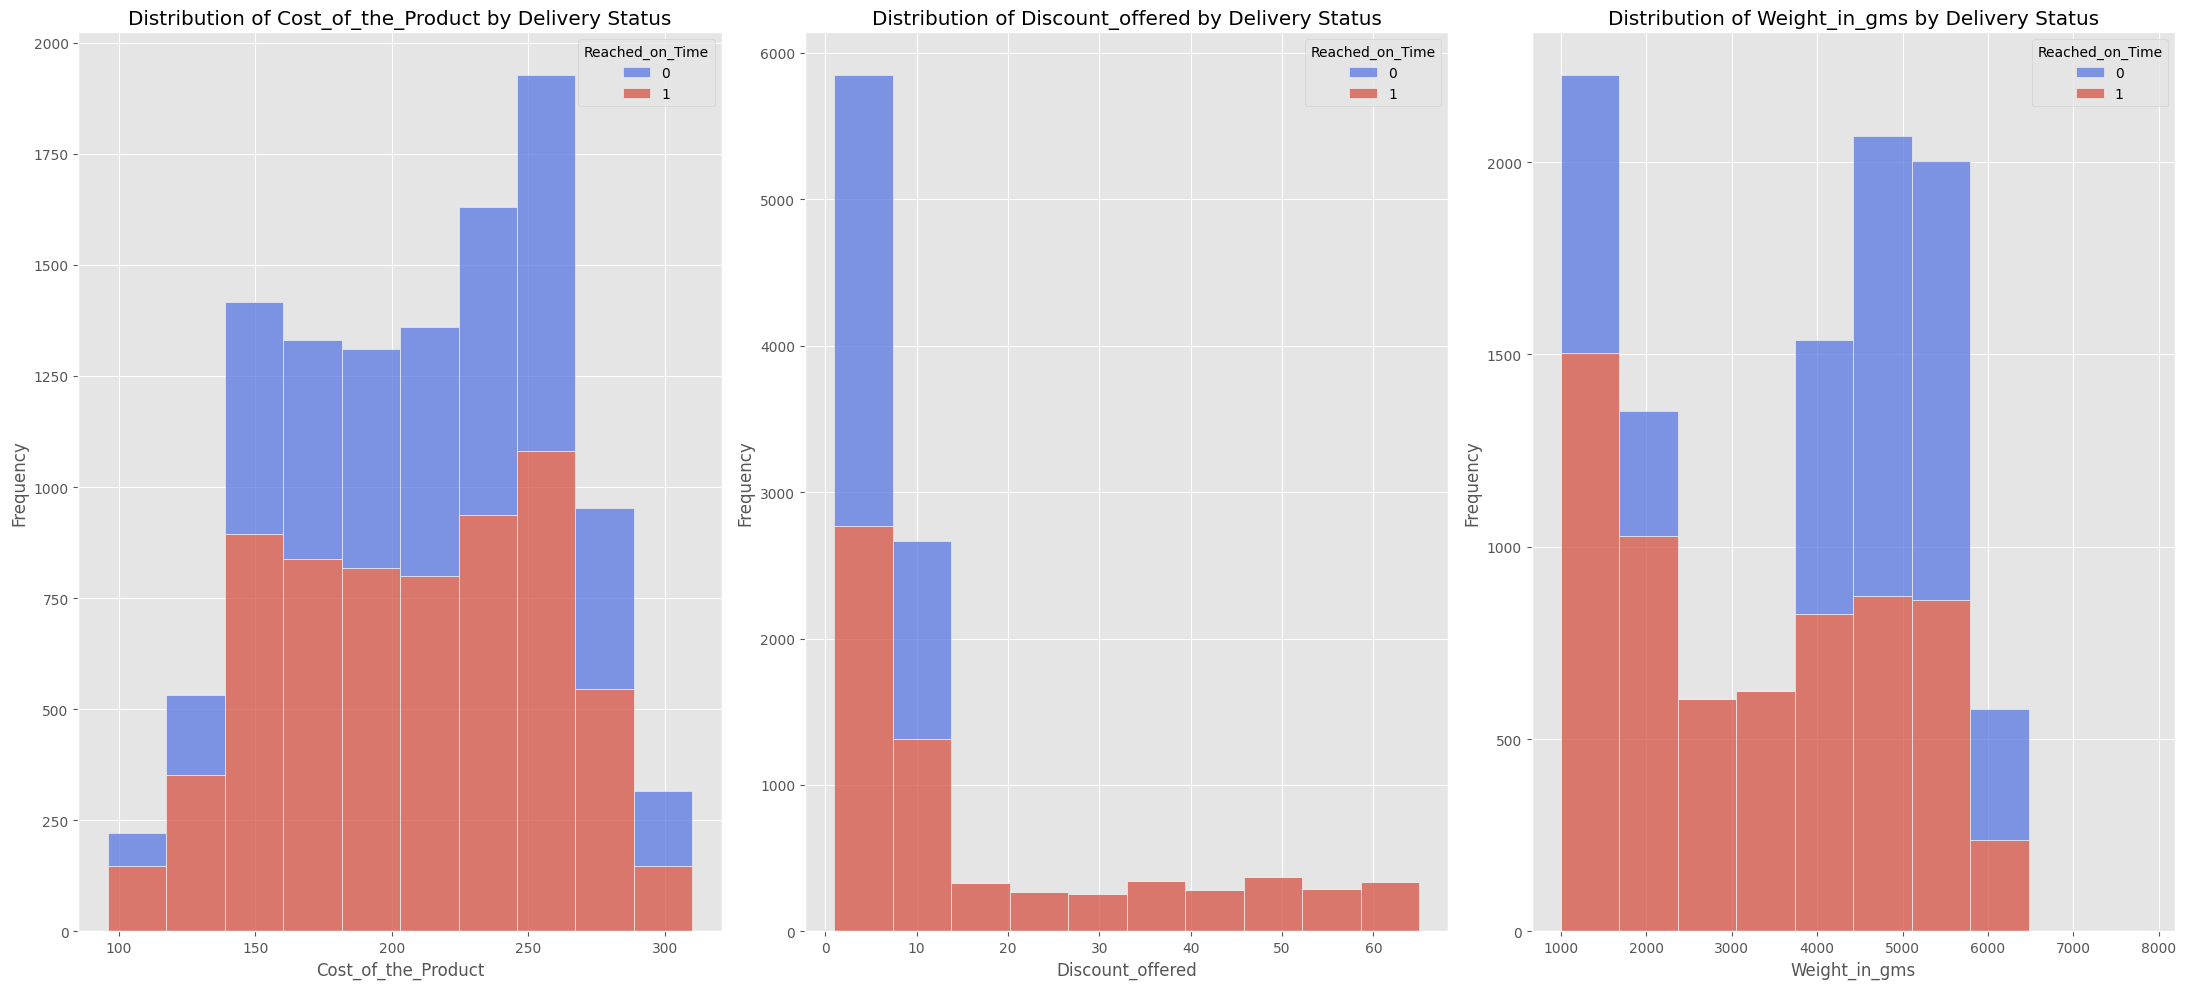

In [11]:
# List of continuous variables to visualize
cont_var = ['Cost_of_the_Product','Discount_offered', 'Weight_in_gms']
fig, axes = plt.subplots(1,3, figsize = (22,10))

for i, cont in enumerate(cont_var):
    sns.histplot(data=data, x = cont, hue='Reached_on_Time', bins=10, multiple= 'stack', ax =axes[i], palette=[cmap(0.1), cmap(0.90)])
    
    # Set title and axis labels
    axes[i].set_title(f'Distribution of {cont} by Delivery Status')
    axes[i].set_xlabel(cont)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

- Regardless of the product price, we observe that the delivery on-time ratio remains consistent.

- A large portion of orders have discounts ranging from 0% to approximately 15%. However, once the discount exceeds this rate, all those orders arrive late. It’s important to note that orders with discounts greater than 15% account for about 2,500 out of a total of 10,999 orders, which is less than 1/4.


### Correlation of Numerical Features

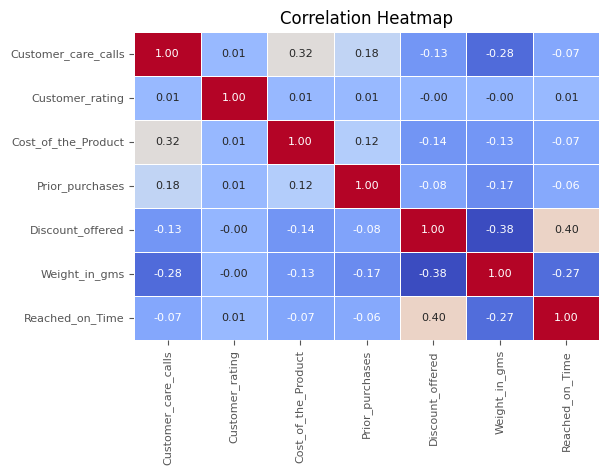

In [12]:
df_num = data.select_dtypes(include='number')

plt.figure(figsize= (6,4))
sns.heatmap(df_num.corr() , 
            annot= True,
            cbar= False,
            cmap= 'coolwarm',
            fmt= '.2f',
            linecolor= 'white', 
            linewidths= 0.5,
            annot_kws= {"size": 8})

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

- **"Discount_offered"** shows the strongest correlation with the target variable **"Reached_on_Time"**, with a moderate positive correlation (**0.40**). This suggests that products with higher discounts are more likely to be **delivered late**.

- On the other hand, **product weight** exhibits a moderate **negative correlation (-0.27)**, indicating that **heavier products are less likely to be delayed**, while lighter products tend to experience more delays.

- Variables like **"Customer_care_calls"**, **"Cost_of_the_Product"**, **"Prior_purchases"**, and **"Customer_rating"** do not show any significant relationship with the likelihood of a product being delivered on time.


## Model Development

### Target Variable

Reached_on_Time
1    59.669061
0    40.330939
Name: proportion, dtype: float64


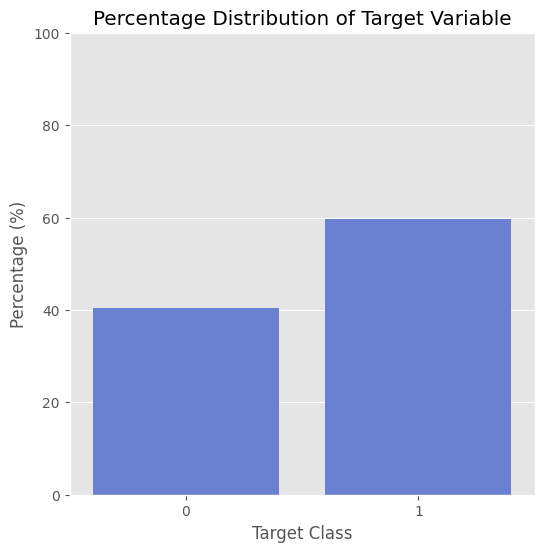

In [13]:
# Calculate and display percentages of delayed (1) and not delayed orders (0)
percentage_counts = data['Reached_on_Time'].value_counts(normalize=True) * 100
print(percentage_counts)

# Visualization with a bar plot
plt.figure(figsize=(6,6))
sns.barplot(x=percentage_counts.index, y=percentage_counts.values, color= cmap(0.1))
plt.title('Percentage Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()

- There is a slight imbalance between the two classes, with approximately 60% of the orders not delivered on time (1) and around 40% delivered on time (0). However, this imbalance isn't significant enough to require strategies typically used for handling extreme class imbalance. With a 60-40 split, models like logistic regression or decision trees can still perform effectively without major adjustments.

### Data Preprocessing

*Firstly, let's create a function who encodes all categorical variables of a DataFrame*

In [14]:
#Let's create a function who encodes all categorical variables of a DataFrame

def encode_categorical(data):
    """ 
    This fonction encodes all categorical variables in the DataFrame using One-Hot Encoding
    
    Parameters:
    data (pd.DataFrame): The input DataFrame with categorical variables.
    
    Returns:
    df_encoded (pd.DataFrame): The DataFrame with categorical variables encoded.
    """
    # Create a copy of data to avoid modifying the original DataFrame
    df = data.copy()
    
    # Select only categorical columns
    categorical_cols= df.select_dtypes(include='object').columns
    
    # One-Hot Encoding of categorical columns
    # I use drop_first=True to avoid the "dummy variable trap" by dropping the first category. This helps to prevent multicollinearity, keeping the model from redundancy.
    df_encoded = pd.get_dummies(df, columns= categorical_cols, drop_first= True)
    
    # Convert any boolean columns to integers (0 and 1)
    for col in df_encoded.select_dtypes(include='bool').columns:
        df_encoded[col] = df_encoded[col].astype('int')
    
    return df_encoded

In [15]:
# I check that everything is in order
df_encoded = encode_categorical(data)
df_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


*Second step, I split my data into training (80%) and testing (20%) sets.*

In [16]:
from sklearn.model_selection import train_test_split

target_variable = 'Reached_on_Time'

# Separate features (X) and target (y)
X = df_encoded.drop(target_variable, axis=1)  
Y = df_encoded[target_variable]        

# Split the data into training and testing sets (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0, shuffle= True)

# Check the shape of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (8799, 15)
X_test shape: (2200, 15)
Y_train shape: (8799,)
Y_test shape: (2200,)


*Finally, I normalize the feature variables to complete the data preprocessing. Normalization allows all variables to be placed on a similar scale. This is particularly important when features have very different units or ranges of values.*

In [17]:
# This code normalizes the feature variables of the training and testing datasets using StandardScaler from sklearn.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns, index= X_train.index )
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Check the result
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
628,1.698400,-1.408157,-2.212307,0.287476,0.574597,-1.336449,-0.450959,2.268161,-0.452418,-0.707830,-0.436096,0.685873,-0.971427,1.153897,-0.984773
6297,1.698400,-1.408157,1.731732,0.950516,-0.400818,-1.574276,2.217495,-0.440886,-0.452418,-0.707830,-0.436096,-1.457997,-0.971427,1.153897,-0.984773
9252,-0.928001,0.718094,0.980487,0.287476,-0.339854,0.699109,-0.450959,-0.440886,2.210344,-0.707830,-0.436096,0.685873,-0.971427,1.153897,-0.984773
5365,-0.928001,0.718094,0.062298,-0.375564,-0.583708,1.440642,-0.450959,-0.440886,-0.452418,1.412768,-0.436096,0.685873,-0.971427,-0.866628,-0.984773
10529,-0.928001,-0.699407,0.521392,-1.038604,-0.278891,0.904006,-0.450959,-0.440886,-0.452418,1.412768,2.293072,-1.457997,-0.971427,1.153897,-0.984773


### Training

*In this section, we train several machine learning models on the training dataset. The goal is to compare different algorithms and evaluate their performance. We selected a range of models to cover both simple and complex algorithms. Logistic Regression provides a baseline for linear relationships, while more advanced models like Random Forest and XGBoost capture non-linear patterns and feature interactions. This variety ensures we explore diverse approaches and find the most effective model for our task.*

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models={ 
        "Logistic_Regression": LogisticRegression(),
        "Random_Forest": RandomForestClassifier(), 
        "KNN": KNeighborsClassifier(), 
        "XGBoost": XGBClassifier(),
        "SVC": SVC()
        }

for name, model in models.items():
    model.fit(X_train,Y_train)
    print(name, "trained")

Logistic_Regression trained
Random_Forest trained
KNN trained
XGBoost trained
SVC trained


### Performance evaluation

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

conf_matrix = []

# Evaluate the performance of each model
for name, model in models.items():
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    # Display the results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)
    
    conf_matrix.append(confusion_matrix(Y_test,Y_pred))


Model: Logistic_Regression
Accuracy: 0.6359
Recall: 0.6772
Precision: 0.6950
F1 Score: 0.6860
------------------------------
Model: Random_Forest
Accuracy: 0.6586
Recall: 0.6401
Precision: 0.7430
F1 Score: 0.6877
------------------------------
Model: KNN
Accuracy: 0.6232
Recall: 0.6641
Precision: 0.6848
F1 Score: 0.6743
------------------------------
Model: XGBoost
Accuracy: 0.6427
Recall: 0.6594
Precision: 0.7112
F1 Score: 0.6843
------------------------------
Model: SVC
Accuracy: 0.6523
Recall: 0.5875
Precision: 0.7659
F1 Score: 0.6649
------------------------------


- **Overall Similar Performance**: The models display relatively similar accuracy, ranging from 0.62 to 0.66. This indicates that no single model dramatically outperforms the others in predicting on-time or delayed deliveries at this stage, suggesting a close competition.
  
- **Competitive Logistic Regression**: Despite being a simple linear model, Logistic Regression performs competitively with a balanced precision-recall trade-off. This implies that the underlying relationships in the data are not overly complex, making it possible for simpler models to capture much of the structure effectively.
  
- **Promising Random Forest and XGBoost**: These advanced models offer a better trade-off between precision and recall and can likely capture non-linear relationships in the data. Although their scores are only slightly higher than Logistic Regression, hyperparameter tuning could further enhance their performance.
  
- **SVC High Precision but Low Recall**: he SVC model prioritizes precision over recall, meaning it minimizes false positives but misses more actual positives. This makes it more suitable for cases where avoiding false positives is critical, though it sacrifices the ability to catch all true cases.

### Hyperparameter Tuning for Model Optimization: Random Forest and XGBoost

*Building on the insights from the 'Performance Evaluation' section, where we noted the potential of Random Forest and XGBoost, we now proceed with hyperparameter tuning. The goal is to fine-tune these models to enhance their performance and achieve an optimal balance between precision and recall.*

#### Adjusting Hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
    }

# Hyperparameter tuning for XGBoost
grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
    }

# Initialise models
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()


# Grid Search for Random Forest
random_forest_gs = GridSearchCV(estimator=random_forest, param_grid= grid_rf, cv= 5, scoring='f1')
random_forest_gs.fit(X_train,Y_train)
best_rf = random_forest_gs.best_estimator_
print("Best Hyperparameters for Random Forest:", random_forest_gs.best_params_)


# Grid Search for XGBoost
xgboost_gs = GridSearchCV(estimator= xgboost, param_grid= grid_xgb, cv= 5, scoring='f1')
xgboost_gs.fit(X_train,Y_train)
best_xgb = xgboost_gs.best_estimator_
print("Best Hyperparameters for XGBoost:", xgboost_gs.best_params_)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


#### Retraining of optimised models

In [21]:
# Re-train the models with optimized hyperparameters
best_rf.fit(X_train, Y_train)
best_xgb.fit(X_train, Y_train)

# Predictions with optimized models
Y_pred_rf_optimized = best_rf.predict(X_test)
Y_pred_xgb_optimized = best_xgb.predict(X_test)

#### Evaluation of optimised models :

In [22]:
# Evaluate Random Forest
accuracy_rf_optimized = accuracy_score(Y_test, Y_pred_rf_optimized)
recall_rf_optimized = recall_score(Y_test, Y_pred_rf_optimized)
precision_rf_optimized = precision_score(Y_test, Y_pred_rf_optimized)
f1_rf_optimized = f1_score(Y_test, Y_pred_rf_optimized)

# Display the results
print("Model: Optimized Random Forest")
print(f"Accuracy: {accuracy_rf_optimized:.4f}")
print(f"Recall: {recall_rf_optimized:.4f}")
print(f"Precision: {precision_rf_optimized:.4f}")
print(f"F1 Score: {f1_rf_optimized:.4f}")
print("-" * 30)

conf_matrix.append(confusion_matrix(Y_test,Y_pred_rf_optimized))

# Evaluate XGBoost
accuracy_xgb_optimized = accuracy_score(Y_test, Y_pred_xgb_optimized)
recall_xgb_optimized = recall_score(Y_test, Y_pred_xgb_optimized)
precision_xgb_optimized = precision_score(Y_test, Y_pred_xgb_optimized)
f1_xgb_optimized = f1_score(Y_test, Y_pred_xgb_optimized)

# Display the results
print("Model: Optimized XGBoost")
print(f"Accuracy: {accuracy_xgb_optimized:.4f}")
print(f"Recall: {recall_xgb_optimized:.4f}")
print(f"Precision: {precision_xgb_optimized:.4f}")
print(f"F1 Score: {f1_xgb_optimized:.4f}")
print("-" * 30)

conf_matrix.append(confusion_matrix(Y_test,Y_pred_xgb_optimized))


Model: Optimized Random Forest
Accuracy: 0.6564
Recall: 0.6300
Precision: 0.7454
F1 Score: 0.6829
------------------------------
Model: Optimized XGBoost
Accuracy: 0.6586
Recall: 0.7020
Precision: 0.7125
F1 Score: 0.7072
------------------------------


- **Slight Improvement for XGBoost**: The recall for **XGBoost** increased from **65.94%** to **70.20%** after optimization, indicating a better ability to identify on-time deliveries. However, this improvement remains modest.

- **Stable Performance of Random Forest**: The **Random Forest** model maintains similar performance, with an F1 score decreasing slightly from **0.6859** to **0.6846**, suggesting that its default parameters were already effective.

- **Moderate Overall Improvements**: The accuracy of **XGBoost** saw a slight rise from **64.27%** to **65.86%**, while **Random Forest** dropped from **65.77%** to **65.27%**. These results indicate that the optimization did not lead to revolutionary changes in the overall performance of the models.

### Confusion Matrix

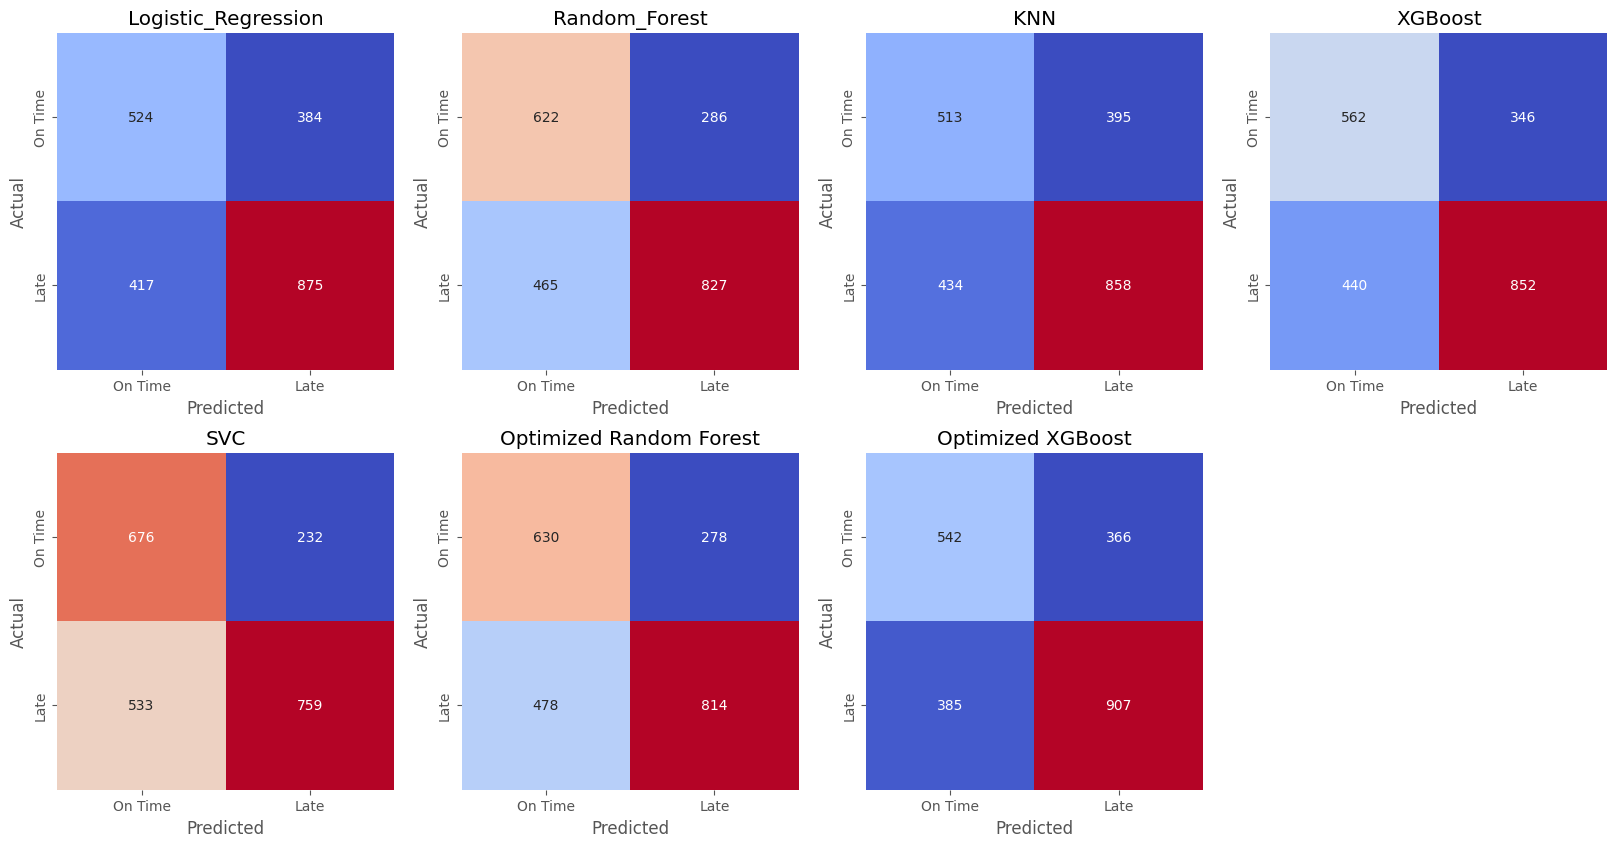

In [23]:
plt.figure(figsize=(20, 10))
model_list = list(models.keys())
model_list.append('Optimized Random Forest')
model_list.append('Optimized XGBoost')


for i, name in enumerate(model_list):
    plt.subplot(2, 4, i + 1)
    sns.heatmap(conf_matrix[i],  
                square= True, 
                cbar= False,
                xticklabels= ['On Time', 'Late'], 
                yticklabels= ['On Time', 'Late'], 
                cmap= 'coolwarm', 
                annot= True,
                fmt= '.0f')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()